In [2]:
from skimage.io import imread, imsave, imshow
from skimage import img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
import requests
import cv2 #pip install opencv-python
%matplotlib inline

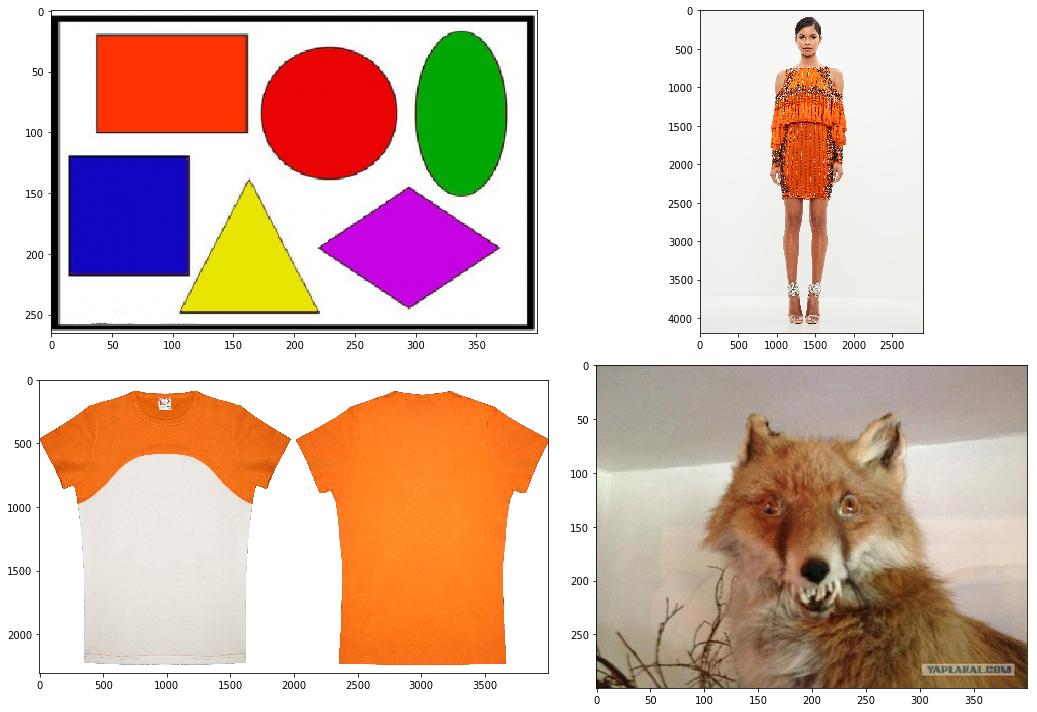

In [161]:
#Загружаем тестовые изображения
i0 = imread('ai_8.png')
i1 = imread('img.jpg')
i2 = imread('img2.jpg')
i3 = imread('img3.jpg')
frame = imread('frame.jpg')

plt.figure(figsize = (15, 10))
plt.subplot(221)
imshow(i0)
plt.subplot(222)
imshow(i1)
plt.subplot(223)
imshow(i2)
plt.subplot(224)
imshow(i3)

In [3]:
#Получение изображения с камеры
cap = cv2.VideoCapture(0)

while(True): 
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

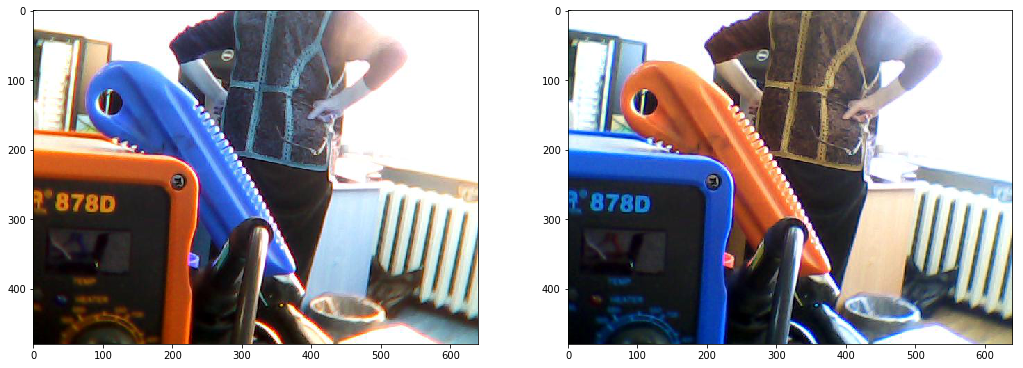

In [162]:
R = frame[:, :, 0]
G = frame[:, :, 1]
B = frame[:, :, 2]
frame1 = np.dstack([B, G, R]) #На кадре с камеры почему-то перепутаны цвета, поэтому преобразуем 

#imsave('frame.jpg', frame)
#imsave('frame1.jpg', frame1)

plt.figure(figsize = (15, 10))
plt.subplot(221)
imshow(frame)
plt.subplot(222)
imshow(frame1)

In [163]:
#Задаем диапазоны цветов
#Оранжевый
#h_min = (100, 180, 200) #Эмпирические
#h_max = (255, 230, 255) #Эмпирические
h_min = (101, 100, 100)
h_max = (109, 255, 255)
#Синий
#h_min = (0, 100, 100)
#h_max = (20, 255, 255)
#Красный
#h_min = (110, 100, 100)
#h_max = (130, 255, 255)
#Зеленый
#h_min = (50, 100, 100)
#h_max = (70, 255, 255)
#Желтый
#h_min = (85, 100, 100)
#h_max = (95, 255, 255)
#Фиолетовый
#h_min = (145, 100, 100)
#h_max = (155, 255, 255)

In [164]:
#Узнаем значения цветов
green = np.uint8([[[0, 255, 0]]])
blue = np.uint8([[[0, 0, 255]]])
red = np.uint8([[[255, 0, 0]]])
orange = np.uint8([[[255, 128, 0]]])
yellow = np.uint8([[[255, 255, 0]]])
purple = np.uint8([[[255, 0, 255]]])

hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
hsv_orange = cv2.cvtColor(orange, cv2.COLOR_BGR2HSV)
hsv_yellow = cv2.cvtColor(yellow, cv2.COLOR_BGR2HSV)
hsv_purple = cv2.cvtColor(purple, cv2.COLOR_BGR2HSV)

print(hsv_green)
print(hsv_blue)
print(hsv_red)
print(hsv_orange)
print(hsv_yellow)
print(hsv_purple)

[[[ 60 255 255]]]
[[[  0 255 255]]]
[[[120 255 255]]]
[[[105 255 255]]]
[[[ 90 255 255]]]
[[[150 255 255]]]


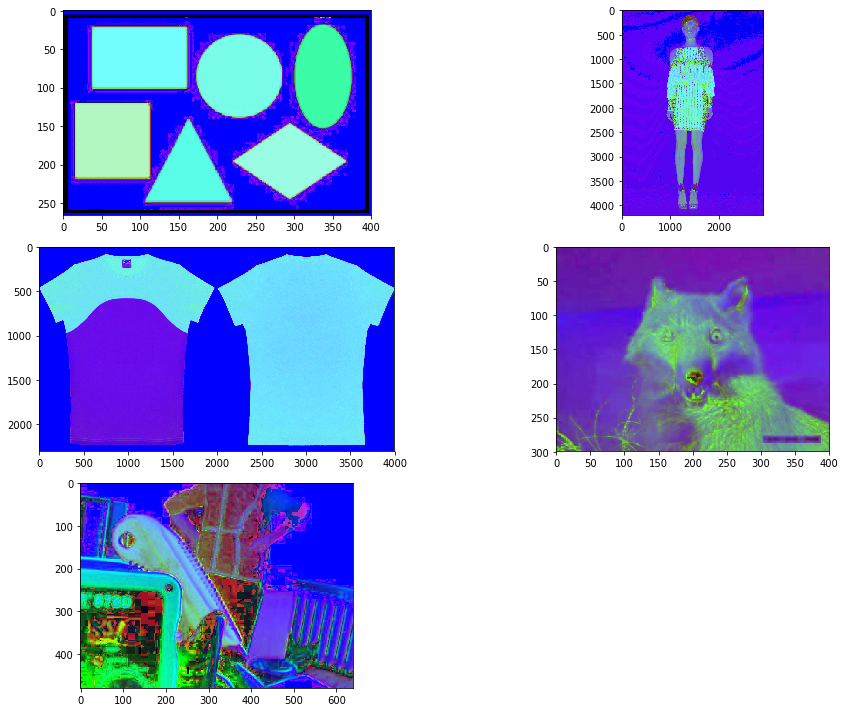

In [165]:
#Преобразование в HSV
hsv = cv2.cvtColor(i0, cv2.COLOR_BGR2HSV) #Переводим изображение из RGB в HSV
hsv1 = cv2.cvtColor(i1, cv2.COLOR_BGR2HSV)
hsv2 = cv2.cvtColor(i2, cv2.COLOR_BGR2HSV)
hsv3 = cv2.cvtColor(i3, cv2.COLOR_BGR2HSV)
hsv_cam = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)

plt.figure(figsize = (15, 10))
plt.subplot(321)
imshow(hsv)
plt.subplot(322)
imshow(hsv1)
plt.subplot(323)
imshow(hsv2)
plt.subplot(324)
imshow(hsv3)

plt.subplot(325)
imshow(hsv_cam)

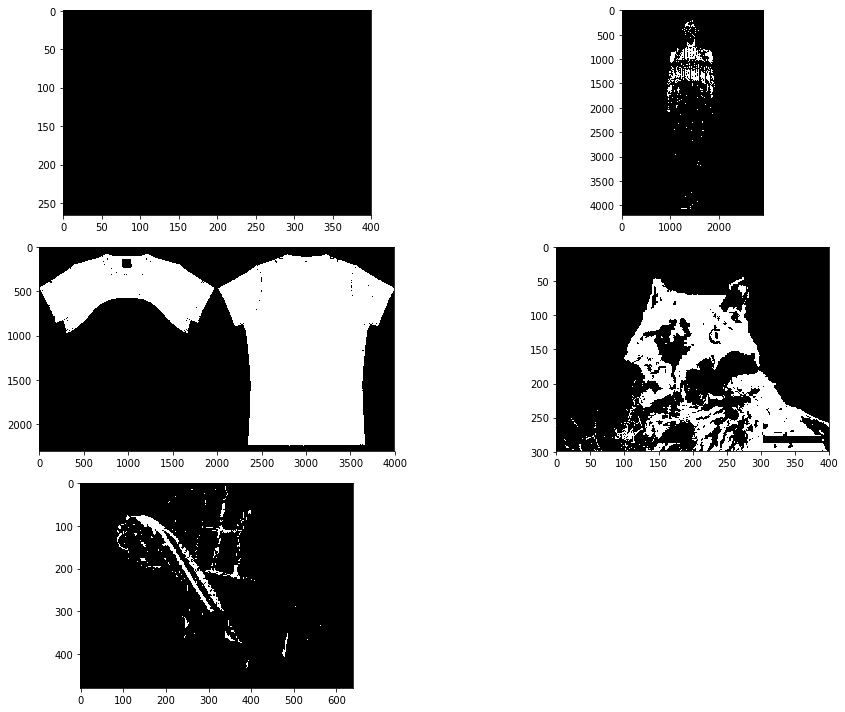

In [166]:
#Фильтрация по цвету
filt = cv2.inRange(hsv, h_min, h_max) #Фильтруем по цвету в заданном диапазоне
filt1 = cv2.inRange(hsv1, h_min, h_max)
filt2 = cv2.inRange(hsv2, h_min, h_max)
filt3 = cv2.inRange(hsv3, h_min, h_max)
filt_cam = cv2.inRange(hsv_cam, h_min, h_max)

plt.figure(figsize = (15, 10))
plt.subplot(321)
imshow(filt)
plt.subplot(322)
imshow(filt1)
plt.subplot(323)
imshow(filt2)
plt.subplot(324)
imshow(filt3)

plt.subplot(325)
imshow(filt_cam)

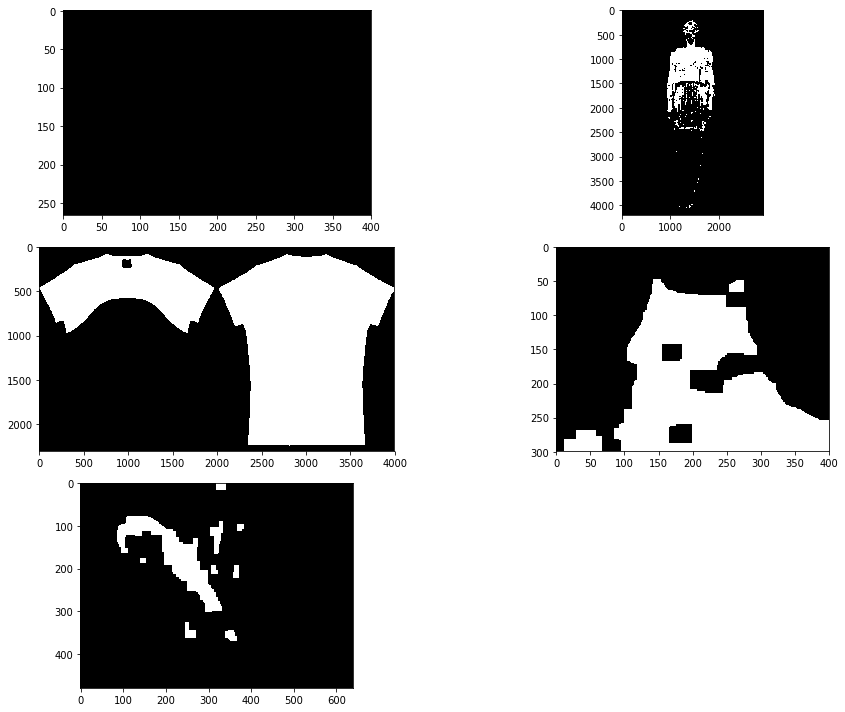

In [167]:
#Морфологическое преобразование
st1 = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21), (10, 10)) #Задаем ядро 
st2 = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11), (5, 5))

filt = cv2.morphologyEx(filt, cv2.MORPH_CLOSE, st1) #Операция закрытия
filt = cv2.morphologyEx(filt, cv2.MORPH_OPEN, st2) #Операция открытия

filt1 = cv2.morphologyEx(filt1, cv2.MORPH_CLOSE, st1)
filt1 = cv2.morphologyEx(filt1, cv2.MORPH_OPEN, st2)

filt2 = cv2.morphologyEx(filt2, cv2.MORPH_CLOSE, st1)
filt2 = cv2.morphologyEx(filt2, cv2.MORPH_OPEN, st2)

filt3 = cv2.morphologyEx(filt3, cv2.MORPH_CLOSE, st1)
filt3 = cv2.morphologyEx(filt3, cv2.MORPH_OPEN, st2)

filt_cam = cv2.morphologyEx(filt_cam, cv2.MORPH_CLOSE, st1)
filt_cam = cv2.morphologyEx(filt_cam, cv2.MORPH_OPEN, st2)

plt.figure(figsize = (15, 10))
plt.subplot(321)
imshow(filt)
plt.subplot(322)
imshow(filt1)
plt.subplot(323)
imshow(filt2)
plt.subplot(324)
imshow(filt3)
plt.subplot(325)
imshow(filt_cam)

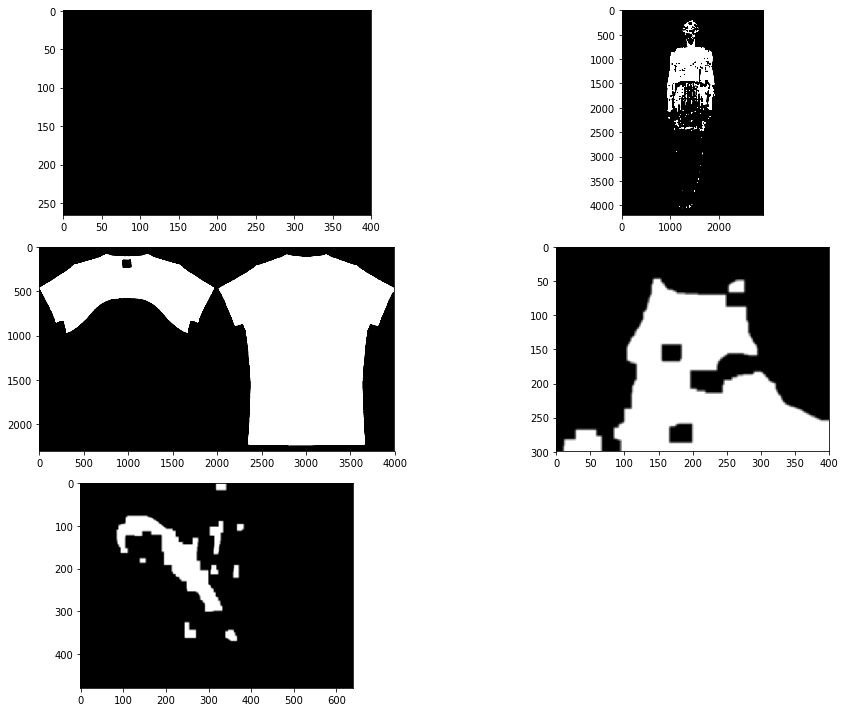

In [168]:
#Размывание
filt = cv2.GaussianBlur(filt, (5, 5), 2) #Используем функцию Гауссовского размытия
filt1 = cv2.GaussianBlur(filt1, (5, 5), 2)
filt2 = cv2.GaussianBlur(filt2, (5, 5), 2)
filt3 = cv2.GaussianBlur(filt3, (5, 5), 2)
filt_cam = cv2.GaussianBlur(filt_cam, (5, 5), 2)

plt.figure(figsize = (15, 10))
plt.subplot(321)
imshow(filt)
plt.subplot(322)
imshow(filt1)
plt.subplot(323)
imshow(filt2)
plt.subplot(324)
imshow(filt3)
plt.subplot(325)
imshow(filt_cam)

0 84
371 385


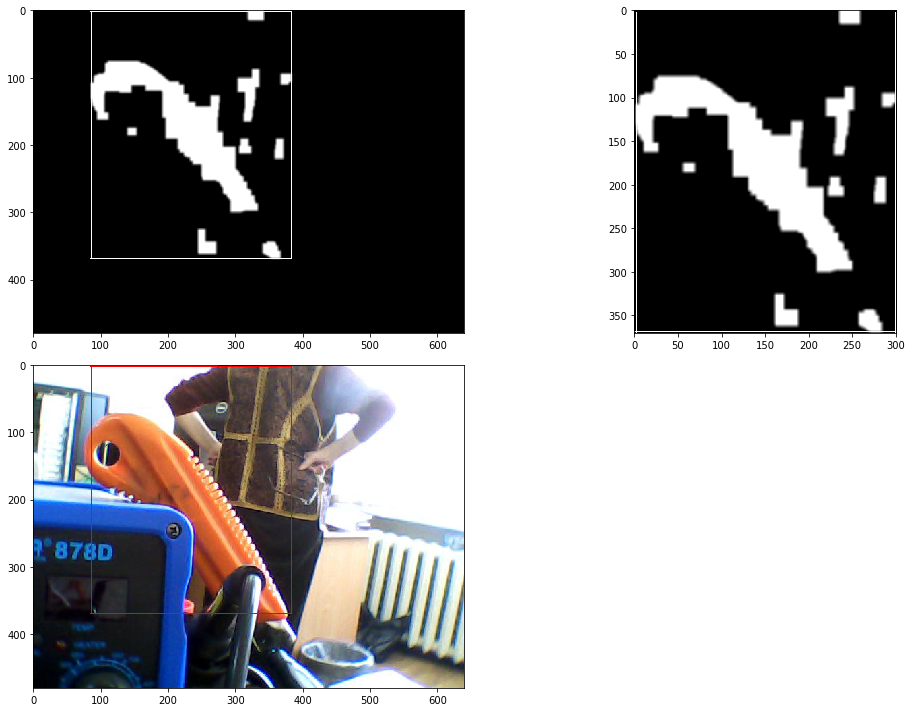

In [169]:
#Детектирование
detect = filt_cam
row = range(0, detect.shape[0]) #Строки
col = range(0, detect.shape[1]) #Столбцы
#pix = np.zeros([detect.shape[0], detect.shape[1]])
flag = 0;
for i in row:
    for j in col:
        if detect[i, j] != flag: #Если цвет пикселя не 0
            row1 = i #Нижняя граница
for j in col:
    for i in row:
        if detect[i, j] != flag:
            col1 = j #Правая граница
for i in reversed(row):
    for j in reversed(col):
        if detect[i, j] != flag:
            row2 = i #Верхняя граница
for j in reversed(col):
    for i in reversed(row):
        if detect[i, j] != flag:
            col2 = j #Левая граница
            
print(row2, col2)
print(row1, col1)

crop = detect[row2:row1, col2:col1]
frame2 = np.ndarray(shape=(frame1.shape[0], frame1.shape[1], 3))

for i in range(0, frame1.shape[0]):
    for j in range(0, frame1.shape[1]):
        frame2[i, j] = frame1[i, j]

if row2 == 0: #Если граница объекта находится на границе кадра - добавляем пару пикселей чтобы было видно все границы
    row2 = row2 + 3
if row1 == 0:
    row1 = row1 + 3
if col1 == 0:
    col1 = col1 + 3
if col2 == 0:
    col2 = col2 + 3

for i in range(row2, row1): #Рисуем границы красным цветом
    for j in range(col2, col1):
        if (i == row2):
            frame2[i, j] = (255, 0, 0)
            detect[i, j] = (255)
        if (j == col2+2): #Без +-2 почему-то не работает
            frame2[i, j] = (255, 0, 0)
            detect[i, j] = (255)
        if (i == row1-2):
            frame2[i, j] = (255, 0, 0)
            detect[i, j] = (255)
        if (j == col1-2):
            frame2[i, j] = (255, 0, 0)
            detect[i, j] = (255)
            
frame2 = frame2.astype('uint8')
frame2 = img_as_ubyte(frame2)

plt.figure(figsize = (15, 10))
plt.subplot(221)
imshow(detect)
plt.subplot(222)
imshow(crop)
plt.subplot(223)
imshow(frame2)

In [170]:
#Расчет углов поворота сервоприводов
objectY = np.round((row1 - 0) / 2) #Ищем центр кадра и центр объекта
objectX = np.round((col1 - 0) / 2)
frameY = np.round(frame2.shape[0] / 2)
frameX = np.round(frame2.shape[1] / 2)

print(objectX, objectY)
print(frameX, frameY)

deltaX = frameX - objectX #Сдвиг по вертикали(если <0 - вниз, >0 - вверх)
deltaY = frameY - objectY #Сдвиг по горизонтали(если <0 - вправо, >0 - влево)

print(deltaX, deltaY)

186.0 192.0
240.0 320.0
54.0 128.0


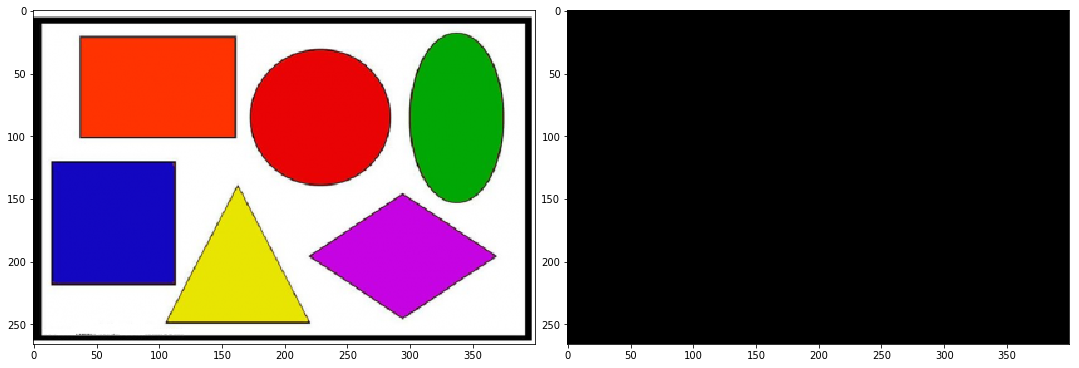

In [171]:
plt.figure(figsize = (15, 10))
plt.subplot(221)
imshow(i0)
plt.subplot(222)
imshow(filt)

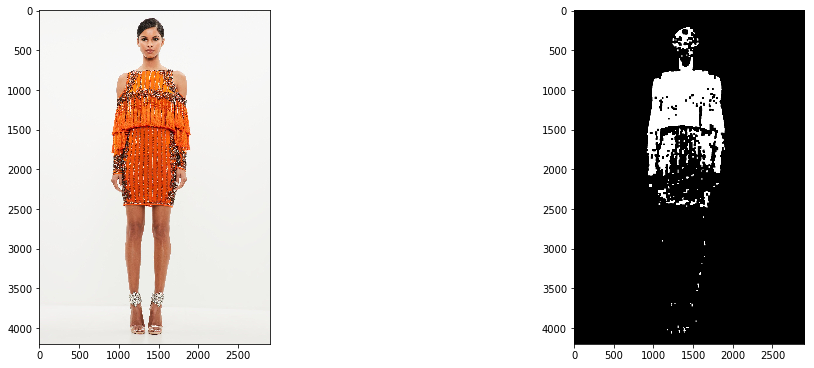

In [172]:
plt.figure(figsize = (15, 10))
plt.subplot(221)
imshow(i1)
plt.subplot(222)
imshow(filt1)

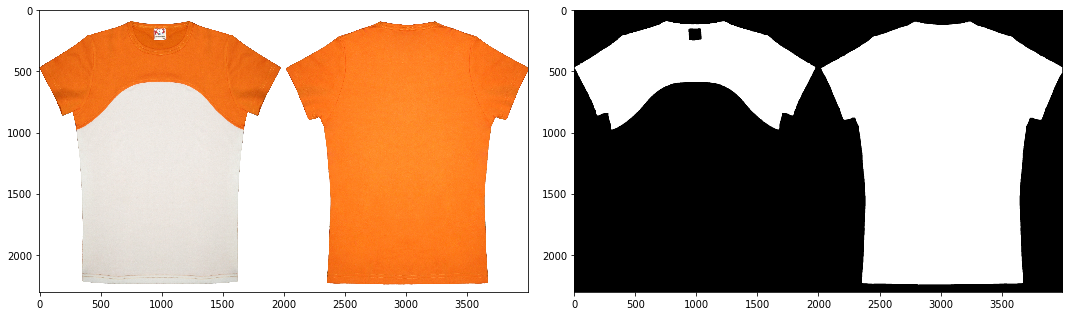

In [173]:
plt.figure(figsize = (15, 10))
plt.subplot(221)
imshow(i2)
plt.subplot(222)
imshow(filt2)

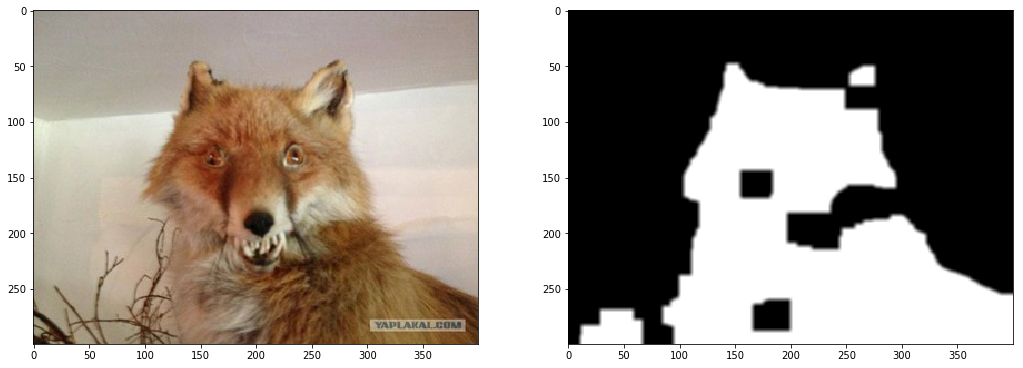

In [174]:
plt.figure(figsize = (15, 10))
plt.subplot(221)
imshow(i3)
plt.subplot(222)
imshow(filt3)

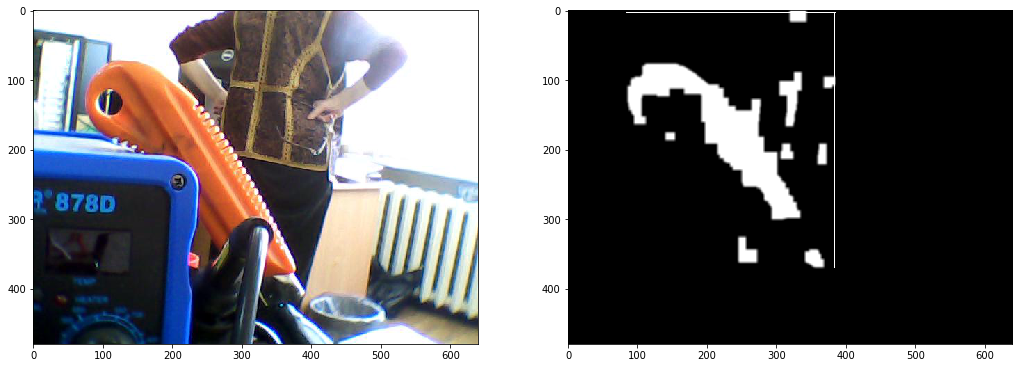

In [177]:
plt.figure(figsize = (15, 10))
plt.subplot(221)
imshow(frame1)
plt.subplot(222)
imshow(filt_cam)

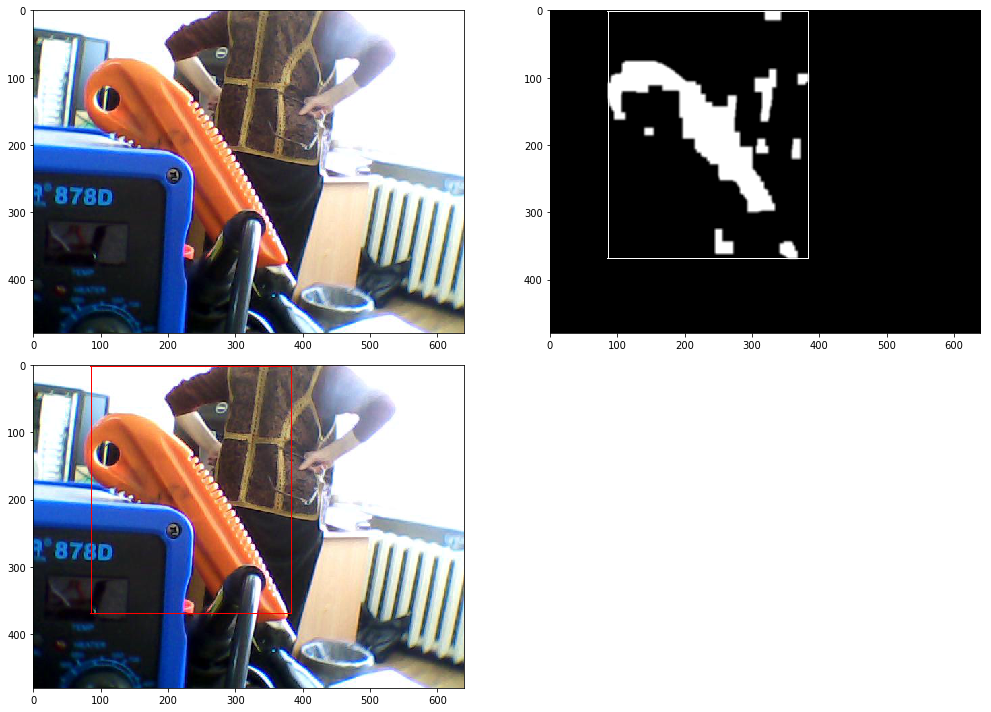

In [176]:
plt.figure(figsize = (15, 10))
plt.subplot(221)
imshow(frame1)
plt.subplot(222)
imshow(filt_cam)
plt.subplot(223)
imshow(frame2)